**Problem Definition:** Predict based on the given data of the Patients that they have heart disease or not



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the heart disease data
heart_disease_0 = pd.read_csv("/content/sample_data/heart_disease_uci.csv")
heart_disease_0.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
heart_disease_0.columns


Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

In [ ]:
heart_disease_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Heart Disease Data Dictionary**

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

    age - age in years
    sex - (1 = male; 0 = female)
    cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
    trestbps - resting blood pressure (in mm Hg on admission to the hospital)
        anything above 130-140 is typically cause for concern
    chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
    fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
    restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
    thalach - maximum heart rate achieved
    exang - exercise induced angina (1 = yes; 0 = no)
    oldpeak - ST depression induced by exercise relative to rest
        looks at stress of heart during excercise
        unhealthy heart will stress more
    slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
    ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
    thal - thalium stress result
      0 = normal
      1 = fixed defect
      2 = reversable defect

    target - have disease or not (1=yes, 0=no) (= the predicted attribute)


# **Data PreProcessing**

In [ ]:
heart_disease_0.shape

(920, 14)

In [ ]:
heart_disease_0.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [ ]:
# Make a copy of the dataset to work on
heart_disease_1 = heart_disease_0.copy()

In [ ]:
# Replace empty strings or cells with only spaces with NaN
heart_disease_1.replace(r'^\s*$', pd.NA, regex=True, inplace=True)


In [ ]:
heart_disease_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


**Note:**



---

When I tried to convert non-numeric data to numeric, null values (NaN) were also being converted to numeric, with a specific category being assigned to them in the corresponding column. To tackle this issue, I had to transform the columns one by one.

1. Before transforming, I checked the `value_counts()`.
2. I transformed the column into numeric format.
3. I then assigned NaN to the category that had been assigned to the null values (NaN).

I created new columns for each transformed column to compare the original and transformed columns, ensuring that the missing values were in the same locations in both. Afterward, I placed the original and transformed columns next to each other for comparison.

---


In [ ]:
heart_disease_1.cp.value_counts()

,count
cp,
0,496
2,204
1,174
3,46


In [ ]:
# Categorical Features into numeric
from sklearn.preprocessing import LabelEncoder

# List categorical columns (based on typical heart disease dataset structure)
# categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
categorical_columns = ['cp']
# Convert categorical columns using Label Encoding (as they likely represent ordinal or binary categories)
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    heart_disease_1["cp"] = le.fit_transform(heart_disease_1[col])

    label_encoders[col] = le  # Save the label encoder for each column if needed later

# The rest of the columns (like age, trestbps, chol, etc.) are already numeric, so no changes needed.

# Display the first few rows of the transformed dataset
heart_disease_1.sex.value_counts()


,count
sex,
1,726
0,194


In [ ]:
# Replacing Null values assigned category with NaN
heart_disease_1['slope_encoded'] = heart_disease_1['slope_encoded'].replace(3, np.nan)

In [ ]:
# Removing dataset column
heart_disease_1.drop("dataset", axis=1, inplace=True)

In [ ]:
# put transformed and original columns next to each other

# Get all columns
all_columns = heart_disease_1.columns.tolist()

# Identify encoded columns (assuming they end with '_encoded')
encoded_columns = [col for col in all_columns if col.endswith('_encoded')]

# Extract base column names
base_columns = [col[:-8] for col in encoded_columns]  # Remove '_encoded'

# Create new column order
new_columns = []
for base_col in base_columns:
    if base_col in all_columns:
        new_columns.append(base_col)
    encoded_col = base_col + '_encoded'
    if encoded_col in all_columns:
        new_columns.append(encoded_col)

# Add any remaining columns
remaining_columns = [col for col in all_columns if col not in new_columns]
new_columns.extend(remaining_columns)

# Reindex the DataFrame
heart_disease_1 = heart_disease_1[new_columns]




---



In [ ]:
heart_disease_1.head()

,thal,thal_encoded,fbs,fbs_encoded,restecg,restecg_encoded,exang,exang_encoded,slope,slope_encoded,id,age,sex,cp,trestbps,chol,thalch,oldpeak,ca,num
0,fixed defect,0.0,True,1.0,lv hypertrophy,0.0,False,0.0,downsloping,0.0,1,63,1,3,145.0,233.0,150.0,2.3,0.0,0
1,normal,1.0,False,0.0,lv hypertrophy,0.0,True,1.0,flat,1.0,2,67,1,0,160.0,286.0,108.0,1.5,3.0,2
2,reversable defect,2.0,False,0.0,lv hypertrophy,0.0,True,1.0,flat,1.0,3,67,1,0,120.0,229.0,129.0,2.6,2.0,1
3,normal,1.0,False,0.0,normal,1.0,False,0.0,downsloping,0.0,4,37,1,2,130.0,250.0,187.0,3.5,0.0,0
4,normal,1.0,False,0.0,lv hypertrophy,0.0,False,0.0,upsloping,2.0,5,41,0,1,130.0,204.0,172.0,1.4,0.0,0


In [ ]:
heart_disease_1_with_duplicate_cols = heart_disease_1.copy()

In [ ]:
heart_disease_1.drop(columns=["thal", "fbs", "restecg", "exang", "slope"], inplace=True)

In [ ]:
heart_disease_1.head()

,thal_encoded,fbs_encoded,restecg_encoded,exang_encoded,slope_encoded,id,age,sex,cp,trestbps,chol,thalch,oldpeak,ca,num
0,0.0,1.0,0.0,0.0,0.0,1,63,1,3,145.0,233.0,150.0,2.3,0.0,0
1,1.0,0.0,0.0,1.0,1.0,2,67,1,0,160.0,286.0,108.0,1.5,3.0,2
2,2.0,0.0,0.0,1.0,1.0,3,67,1,0,120.0,229.0,129.0,2.6,2.0,1
3,1.0,0.0,1.0,0.0,0.0,4,37,1,2,130.0,250.0,187.0,3.5,0.0,0
4,1.0,0.0,0.0,0.0,2.0,5,41,0,1,130.0,204.0,172.0,1.4,0.0,0


In [ ]:
heart_disease_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   thal_encoded     434 non-null    float64
 1   fbs_encoded      830 non-null    float64
 2   restecg_encoded  918 non-null    float64
 3   exang_encoded    865 non-null    float64
 4   slope_encoded    611 non-null    float64
 5   id               920 non-null    int64  
 6   age              920 non-null    int64  
 7   sex              920 non-null    int64  
 8   cp               920 non-null    int64  
 9   trestbps         861 non-null    float64
 10  chol             890 non-null    float64
 11  thalch           865 non-null    float64
 12  oldpeak          858 non-null    float64
 13  ca               309 non-null    float64
 14  num              920 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 107.9 KB


In [ ]:
heart_disease_1.rename(columns={"thal_encoded":"thal", "fbs_encoded":"fbs", "restecg_encoded":"restecg", "exang_encoded": "exang", "slope_encoded":"slope"}, inplace=True)

In [ ]:
heart_disease_1.head()

,thal,fbs,restecg,exang,slope,id,age,sex,cp,trestbps,chol,thalch,oldpeak,ca,num
0,0.0,1.0,0.0,0.0,0.0,1,63,1,3,145.0,233.0,150.0,2.3,0.0,0
1,1.0,0.0,0.0,1.0,1.0,2,67,1,0,160.0,286.0,108.0,1.5,3.0,2
2,2.0,0.0,0.0,1.0,1.0,3,67,1,0,120.0,229.0,129.0,2.6,2.0,1
3,1.0,0.0,1.0,0.0,0.0,4,37,1,2,130.0,250.0,187.0,3.5,0.0,0
4,1.0,0.0,0.0,0.0,2.0,5,41,0,1,130.0,204.0,172.0,1.4,0.0,0


In [ ]:
heart_disease_1.to_csv("Heart-Disease-UCI-Numeric-data.csv")

# **Filling Missing Values**

In [ ]:
heart_disease = pd.read_csv("/content/sample_data/Heart-Disease-UCI-Numeric-data.csv")
heart_disease.head()

,Unnamed: 0,thal,fbs,restecg,exang,slope,id,age,sex,cp,trestbps,chol,thalch,oldpeak,ca,num
0,0,0.0,1.0,0.0,0.0,0.0,1,63,1,3,145.0,233.0,150.0,2.3,0.0,0
1,1,1.0,0.0,0.0,1.0,1.0,2,67,1,0,160.0,286.0,108.0,1.5,3.0,2
2,2,2.0,0.0,0.0,1.0,1.0,3,67,1,0,120.0,229.0,129.0,2.6,2.0,1
3,3,1.0,0.0,1.0,0.0,0.0,4,37,1,2,130.0,250.0,187.0,3.5,0.0,0
4,4,1.0,0.0,0.0,0.0,2.0,5,41,0,1,130.0,204.0,172.0,1.4,0.0,0


In [ ]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   thal      434 non-null    float64
 1   fbs       830 non-null    float64
 2   restecg   918 non-null    float64
 3   exang     865 non-null    float64
 4   slope     611 non-null    float64
 5   id        920 non-null    int64  
 6   age       920 non-null    int64  
 7   sex       920 non-null    int64  
 8   cp        920 non-null    int64  
 9   trestbps  861 non-null    float64
 10  chol      890 non-null    float64
 11  thalch    865 non-null    float64
 12  oldpeak   858 non-null    float64
 13  ca        309 non-null    float64
 14  num       920 non-null    int64  
dtypes: float64(10), int64(5)
memory usage: 107.9 KB


In [ ]:
heart_disease.drop("Unnamed: 0", axis=1, inplace=True)

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
# These continous_features are missing 10% of values so mean/median imputation is good choice
continuous_features = [ "trestbps", "chol", "thalch", "oldpeak"]
continuous_imputer = SimpleImputer(strategy= "median")

imputer = ColumnTransformer([("continuous_imputer", continuous_imputer, continuous_features)])
heart_disease[["trestbps", "chol", "thalch", "oldpeak"]] = pd.DataFrame(imputer.fit_transform(heart_disease[["trestbps", "chol", "thalch", "oldpeak"]]), columns=["trestbps", "chol", "thalch", "oldpeak"])
heart_disease.head()

,thal,fbs,restecg,exang,slope,id,age,sex,cp,trestbps,chol,thalch,oldpeak,ca,num
0,0.0,1.0,0.0,0.0,0.0,1,63,1,3,145.0,233.0,150.0,2.3,0.0,0
1,1.0,0.0,0.0,1.0,1.0,2,67,1,0,160.0,286.0,108.0,1.5,3.0,2
2,2.0,0.0,0.0,1.0,1.0,3,67,1,0,120.0,229.0,129.0,2.6,2.0,1
3,1.0,0.0,1.0,0.0,0.0,4,37,1,2,130.0,250.0,187.0,3.5,0.0,0
4,1.0,0.0,0.0,0.0,2.0,5,41,0,1,130.0,204.0,172.0,1.4,0.0,0


In [ ]:
heart_disease.isnull().sum()

,0
thal,486
fbs,90
restecg,2
exang,55
slope,309
id,0
age,0
sex,0
cp,0
trestbps,0


In [ ]:
# Mode Imputation for categorical variables with a few missing values:
categorical_features = ["restecg", "exang"]
categorical_imputer = SimpleImputer(strategy= "most_frequent")

imputer_2 = ColumnTransformer([("categorical_imputer", categorical_imputer, categorical_features)])
heart_disease[["restecg", "exang"]] = pd.DataFrame(imputer_2.fit_transform(heart_disease[["restecg", "exang"]]), columns=["restecg", "exang"])
heart_disease.head()

,thal,fbs,restecg,exang,slope,id,age,sex,cp,trestbps,chol,thalch,oldpeak,ca,num
0,0.0,1.0,0.0,0.0,0.0,1,63,1,3,145.0,233.0,150.0,2.3,0.0,0
1,1.0,0.0,0.0,1.0,1.0,2,67,1,0,160.0,286.0,108.0,1.5,3.0,2
2,2.0,0.0,0.0,1.0,1.0,3,67,1,0,120.0,229.0,129.0,2.6,2.0,1
3,1.0,0.0,1.0,0.0,0.0,4,37,1,2,130.0,250.0,187.0,3.5,0.0,0
4,1.0,0.0,0.0,0.0,2.0,5,41,0,1,130.0,204.0,172.0,1.4,0.0,0


In [ ]:
heart_disease.isnull().sum()

,0
thal,486
fbs,90
restecg,0
exang,0
slope,309
id,0
age,0
sex,0
cp,0
trestbps,0


**Imputation Using KNN or Iterative Methods for Complex Missingness:**

 The slope, ca, and thal columns have substantial missing data (up to 50-60%). For these, mean or mode imputation would likely introduce bias. KNN Imputation or Iterative Imputer (like MICE) are better choices here. These algorithms consider the relationship between features, which is essential since these variables could be correlated with others in the dataset (e.g., thalassemia and heart conditions).

In [ ]:
# Iterative Imputer
from sklearn.experimental import enable_iterative_imputer  # Needed to enable IterativeImputer
from sklearn.impute import IterativeImputer

# Define the columns to perform Iterative Imputation on
columns_to_impute = ['slope', 'ca', 'fbs', 'thal']

# Initialize the Iterative Imputer
iter_imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply the imputer only on the selected columns
heart_disease[['slope', 'ca', 'fbs', 'thal']] = pd.DataFrame(iter_imputer.fit_transform(heart_disease[['slope', 'ca', 'fbs', 'thal']]), columns=['slope', 'ca', 'fbs', 'thal'])

# to round the imputed values to the nearest integer
heart_disease[['slope', 'ca', 'fbs', 'thal']] = heart_disease[['slope', 'ca', 'fbs', 'thal']].apply(np.round)

# Check if missing values in the specified columns are imputed
print(heart_disease[['slope', 'ca', 'fbs', 'thal']].isnull().sum())


slope    0
ca       0
fbs      0
thal     0
dtype: int64


In [ ]:
heart_disease.isnull().sum()

,0
thal,0
fbs,0
restecg,0
exang,0
slope,0
id,0
age,0
sex,0
cp,0
trestbps,0


In [ ]:
# heart_disease.to_csv("Filled_numeric_Heart_disease.csv")

In [ ]:
# Changing the order of columns
# heart_disease = pd.read_csv("/content/sample_data/Filled_numeric_Heart_disease.csv")
desired_order = ['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                 'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
heart_disease = heart_disease_1[desired_order]
heart_disease.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,1,0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
2,3,67,1,0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


In [ ]:
heart_disease_1.to_csv("Filled_numeric_Heart_disease.csv", index=False)

In [ ]:
# Drop id column
heart_disease.drop("id", axis=1, inplace=True)

# **Exploratory Data Analysis (EDA)**

Practical Steps for Exploratory Data Analysis (EDA):

  **1. Univariate Analysis:**

        Analyze the distribution of individual variables, both categorical and numerical.
        This can be done using histograms for numerical features and bar plots for categorical features.

  **2. Bivariate Analysis:**

        Analyze the relationship between pairs of variables, especially between features and the target variable (heart disease).
        This includes correlation analysis for numerical features and cross-tabulation or group analysis for categorical features.

  **3. Multivariate Analysis:**

        Explore the interactions between multiple variables at once. This could involve visualizations like pairplots or correlation heatmaps.

  **4. Outliers Detection:**

        Identify outliers using box plots or z-scores, which could impact modeling.

  **5. Feature Engineering Ideas:**

        Create new features or transform existing ones based on the relationships discovered during EDA.

**Step 1: Univariate Analysis**

What it is:
Univariate analysis is the examination of the distribution of each individual variable. It’s called "univariate" because it looks at one variable at a time. This step helps us understand the characteristics of each feature on its own.

**Why we perform it:**

  Understand the data distribution: We need to know how our data is distributed (e.g., are the values skewed, are there outliers, etc.). This helps in selecting appropriate transformations or algorithms during modeling.
  Detect anomalies: Outliers or unusual patterns can lead to model instability. Detecting these early helps in deciding whether to handle them.
  Feature engineering: Some distributions might prompt us to create new features (e.g., bucketing continuous variables or creating flags for outliers).

**Impact on ML modeling:**

  Skewed distributions can negatively affect algorithms that assume normality (e.g., linear regression). Knowing the distribution can guide transformations (e.g., log transformations).
  Outliers can disproportionately impact certain models (e.g., decision trees or k-means clustering), and identifying them helps in deciding whether to remove or cap them.

**Let's break this into two parts:**

  1. For numerical variables, we’ll use histograms to check their distribution.
  2. For categorical variables, we’ll use bar plots to examine the frequency of each category.


In [ ]:
# load the data
heart_disease = pd.read_csv("/content/sample_data/Filled_numeric_Heart_disease.csv")
heart_disease.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,1,0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,2
2,3,67,1,0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


[Text(0.5, 1.0, 'ST Depression Induced by Exercise Relative to Rest Distribution'),
 Text(0.5, 0, 'ST Depression Induced by Exercise Relative to Rest'),
 Text(0, 0.5, 'Counts')]

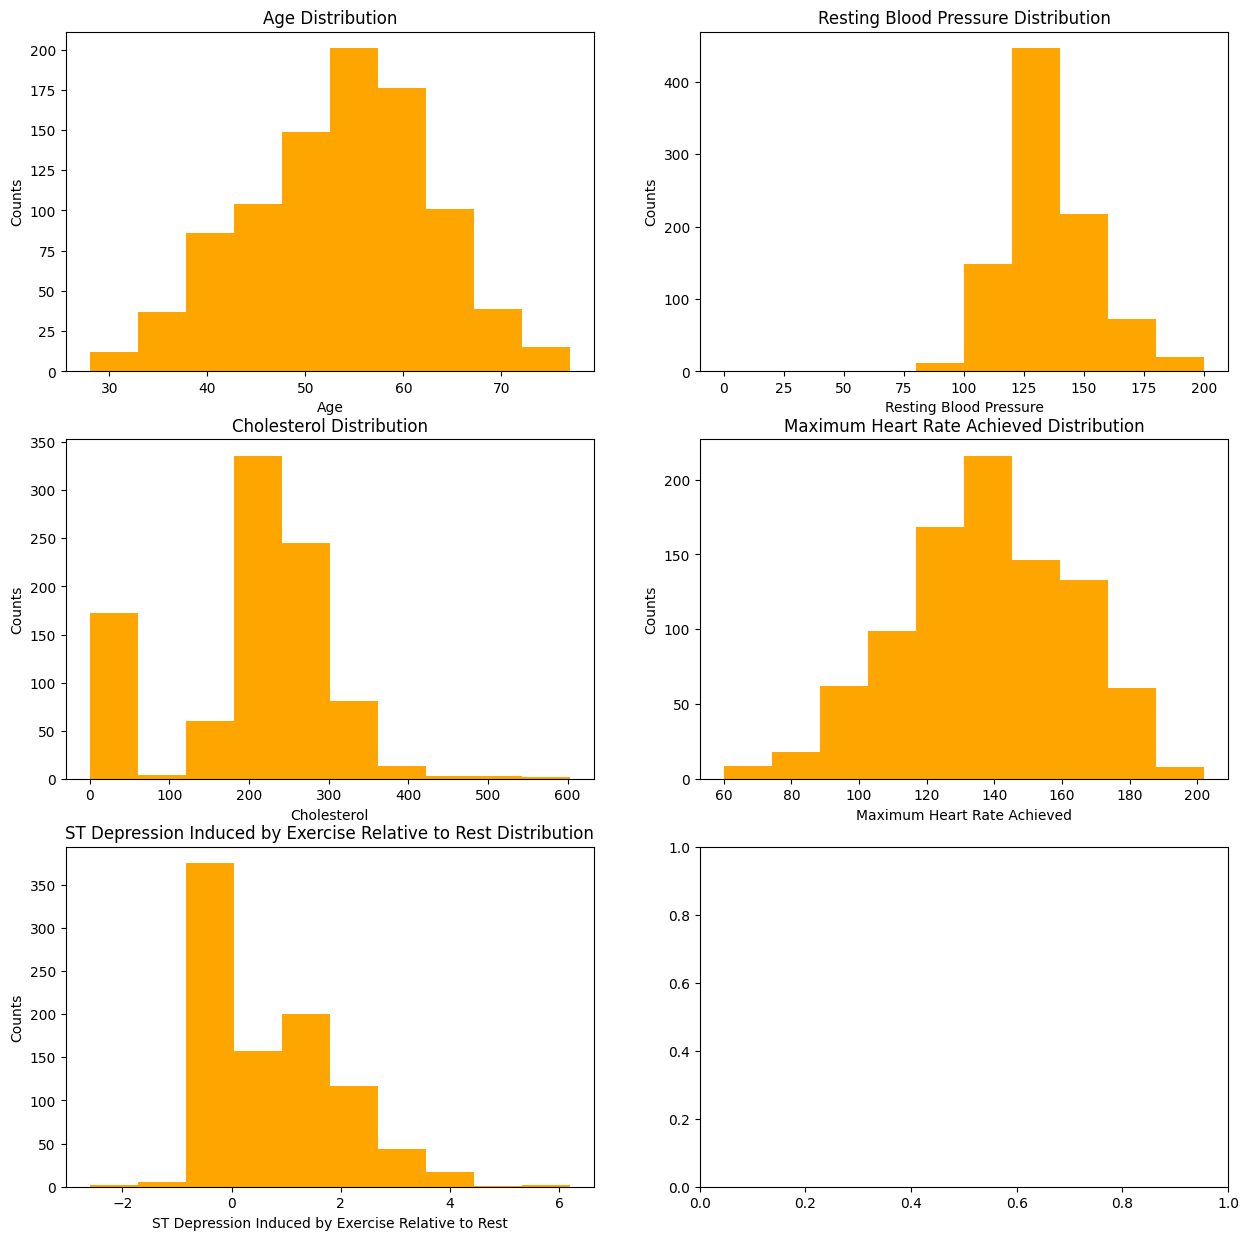

In [ ]:
# Distribution of Numeric Features
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
ax[0,0].hist(heart_disease["age"], color="orange")
ax[0,0].set(title="Age Distribution", xlabel="Age", ylabel="Counts")
ax[0,1].hist(heart_disease["trestbps"], color="orange")
ax[0,1].set(title="Resting Blood Pressure Distribution", xlabel="Resting Blood Pressure", ylabel="Counts")
ax[1,0].hist(heart_disease["chol"], color="orange")
ax[1,0].set(title="Cholesterol Distribution", xlabel="Cholesterol", ylabel="Counts")
ax[1,1].hist(heart_disease["thalch"], color="orange")
ax[1,1].set(title="Maximum Heart Rate Achieved Distribution", xlabel="Maximum Heart Rate Achieved", ylabel="Counts")
ax[2,0].hist(heart_disease["oldpeak"], color="orange");
ax[2,0].set(title="ST Depression Induced by Exercise Relative to Rest Distribution", xlabel="ST Depression Induced by Exercise Relative to Rest", ylabel="Counts")

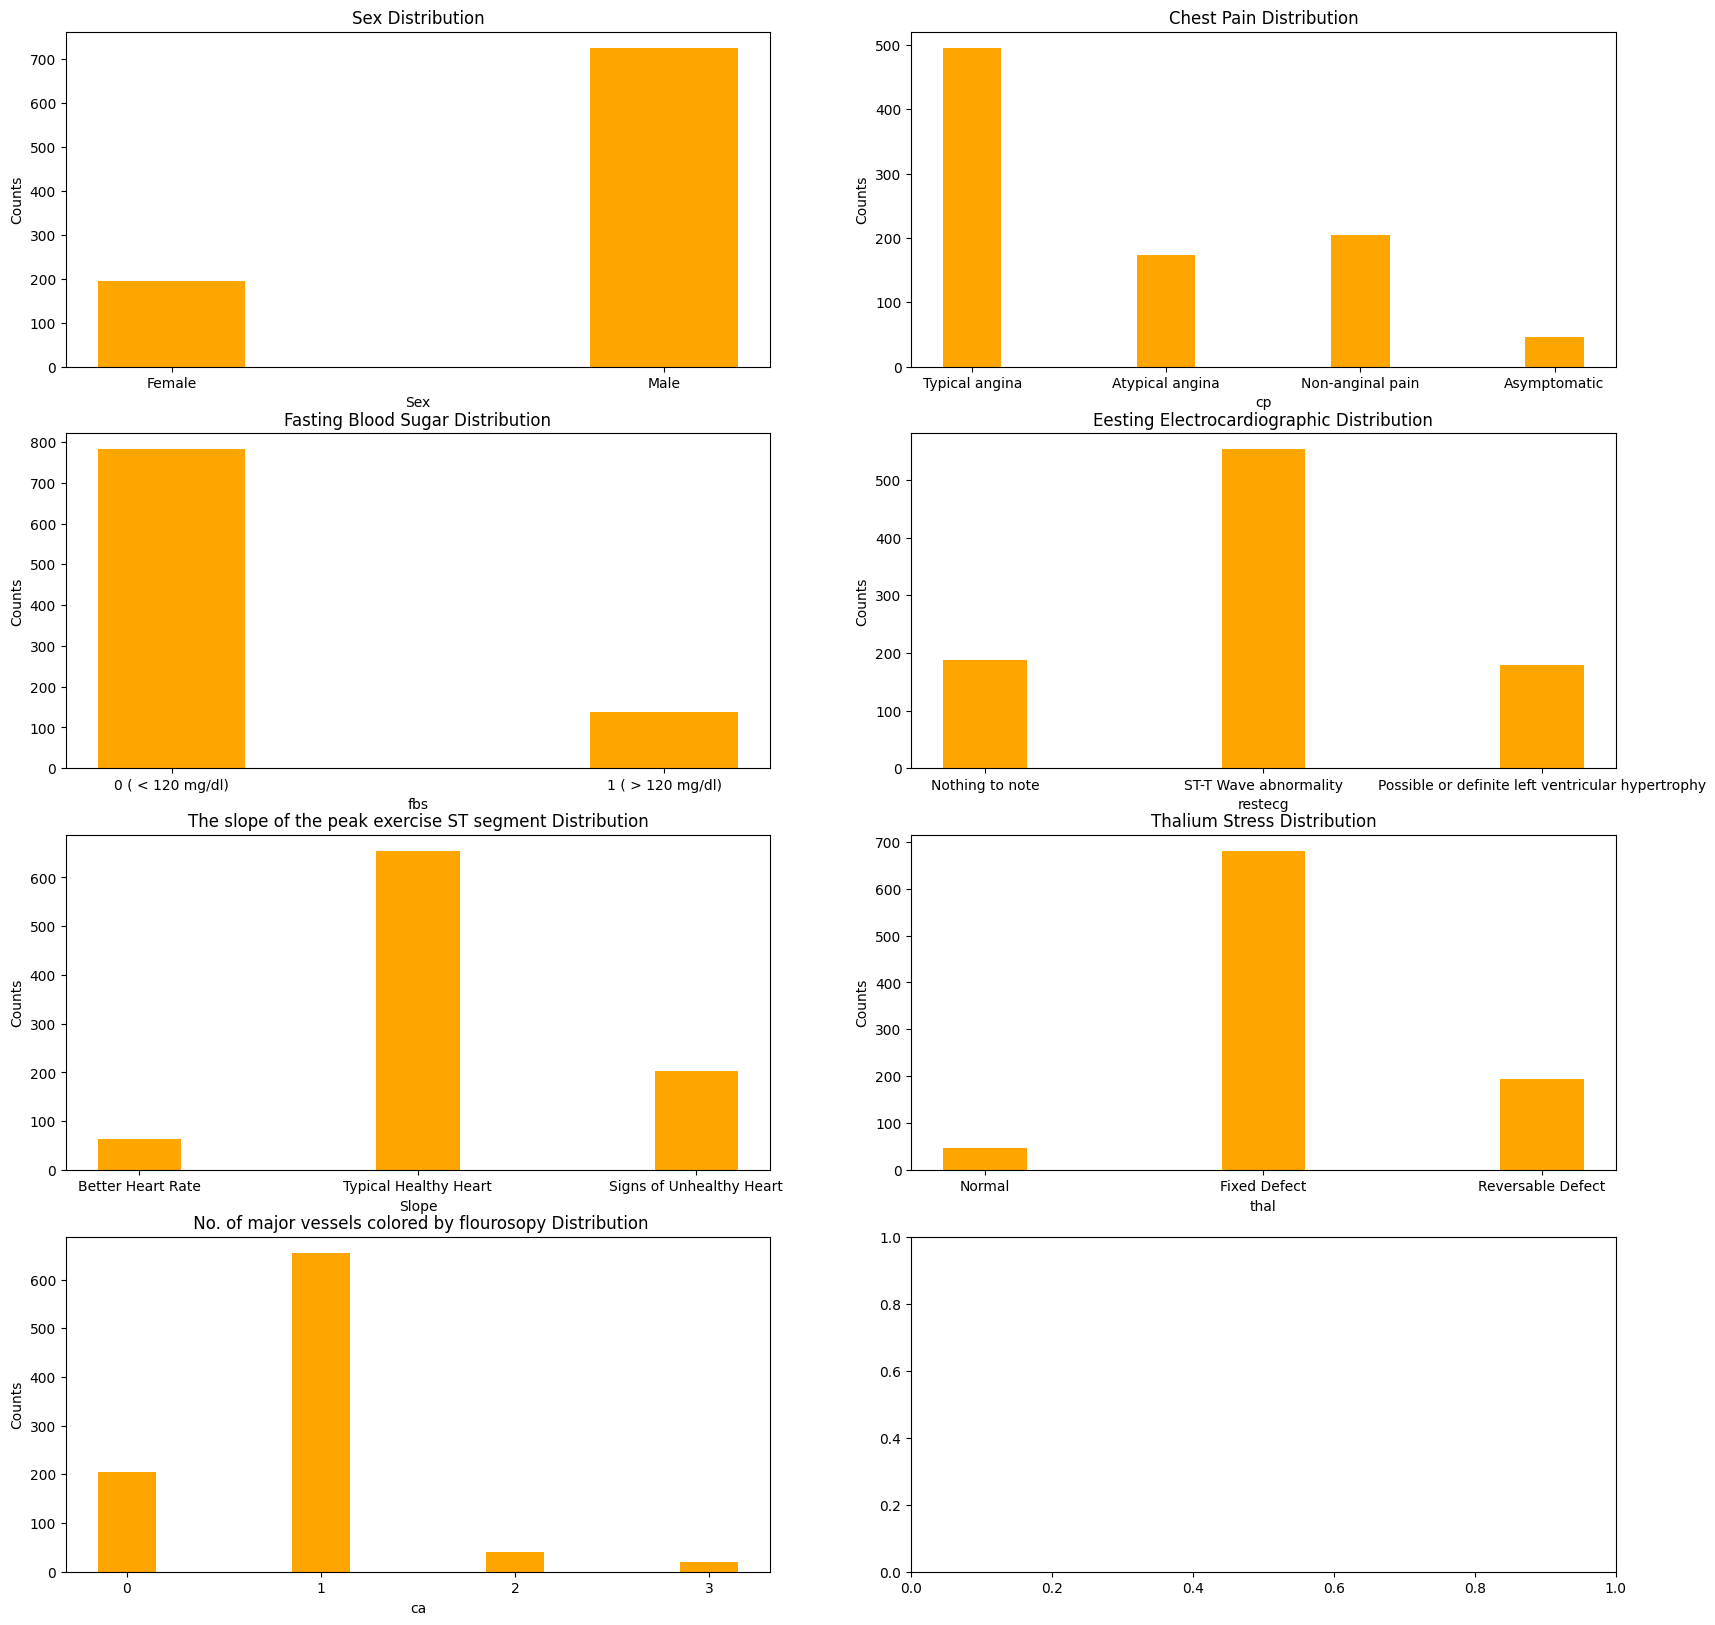

In [ ]:
   # categorical variables distributions using bar plots.
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20,20))
# age
ax[0,0].bar(heart_disease["sex"].value_counts().index, heart_disease["sex"].value_counts().values, width=0.3, color="orange")
ax[0,0].set(title="Sex Distribution", xlabel="Sex", ylabel="Counts")
ax[0,0].set_xticks(ticks=[0,1], labels=["Female", "Male"])
# cp
ax[0,1].bar(heart_disease["cp"].value_counts().index, heart_disease["cp"].value_counts().values, width=0.3, color="orange")
ax[0,1].set(title="Chest Pain Distribution", xlabel="cp", ylabel="Counts")
ax[0,1].set_xticks(ticks=[0,1,2,3], labels=["Typical angina", "Atypical angina", "Non-anginal pain", "Asymptomatic"])
# fbs
ax[1,0].bar(heart_disease["fbs"].value_counts().index, heart_disease["fbs"].value_counts().values, width=0.3, color="orange")
ax[1,0].set(title="Fasting Blood Sugar Distribution", xlabel="fbs", ylabel="Counts")
ax[1,0].set_xticks(ticks=[0,1], labels=["0 ( < 120 mg/dl)", "1 ( > 120 mg/dl)"])
# restecg
ax[1,1].bar(heart_disease["restecg"].value_counts().index, heart_disease["restecg"].value_counts().values, width=0.3, color="orange")
ax[1,1].set(title="Eesting Electrocardiographic Distribution", xlabel="restecg", ylabel="Counts")
ax[1,1].set_xticks(ticks=[0,1,2], labels=["Nothing to note", "ST-T Wave abnormality", "Possible or definite left ventricular hypertrophy"])
# slope
ax[2,0].bar(heart_disease["slope"].value_counts().index, heart_disease["slope"].value_counts().values, width=0.3, color="orange")
ax[2,0].set(title="The slope of the peak exercise ST segment Distribution", xlabel="Slope", ylabel="Counts")
ax[2,0].set_xticks(ticks=[0,1,2], labels=["Better Heart Rate", "Typical Healthy Heart", "Signs of Unhealthy Heart"])
# thal
# slope
ax[2,1].bar(heart_disease["thal"].value_counts().index, heart_disease["thal"].value_counts().values, width=0.3, color="orange")
ax[2,1].set(title="Thalium Stress Distribution", xlabel="thal", ylabel="Counts")
ax[2,1].set_xticks(ticks=[0,1,2], labels=["Normal", "Fixed Defect", "Reversable Defect"])
# ca
ax[3,0].bar(heart_disease["ca"].value_counts().index, heart_disease["ca"].value_counts().values, width=0.3, color="orange")
ax[3,0].set(title=" No. of major vessels colored by flourosopy Distribution", xlabel="ca", ylabel="Counts")
ax[3,0].set_xticks(ticks=[0,1,2,3], labels=["0", "1", "2", "3"]);

In [ ]:
# converting target column into 1's and 0's only
# change name from num to target
heart_disease.rename({"num":"Target"}, inplace=True, axis=1)
heart_disease["Target"] = heart_disease["Target"].apply(lambda x:1 if x>1 else x)
heart_disease.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,Target
0,1,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,1,0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,1
2,3,67,1,0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


In [ ]:
heart_disease.Target.value_counts()

,count
Target,
1,509
0,411


In [ ]:
heart_disease.to_csv("Heart_disease_ready.csv")

**Step 2: Bivariate Analysis**

Bivariate analysis involves examining the relationship between two variables, specifically between the features and the target variable (in this case, heart disease). The goal is to understand how each feature correlates with the outcome and identify which features are likely to be important predictors.

Why we perform it:

  **Identify important features:** Understanding how each feature correlates with the target variable helps in feature selection. Strongly correlated features can be prioritized in modeling.

  **Detect relationships:** Certain features might have non-linear or complex relationships with the target variable, which can influence how we model them.
   
  **Feature transformation:** If certain features show non-linear relationships with the target, it might indicate that these features need transformation (e.g., binning, encoding) to improve model performance.

**Impact on ML modeling:**

    Feature importance: Features that show a strong relationship with the target are often more predictive, while those with weak relationships may be less useful or irrelevant. This understanding informs how we select features for modeling.
    Potential interactions: Bivariate analysis can also give clues about potential feature interactions that could be important, especially for tree-based models or models that benefit from interaction terms.

**Let's explore this in two parts:**

    Numerical variables vs. the target: We’ll use box plots to visualize how each numerical feature differs across the target classes.
    Categorical variables vs. the target: We’ll use bar plots or cross-tabulations to see how the frequency of each category varies based on heart disease status

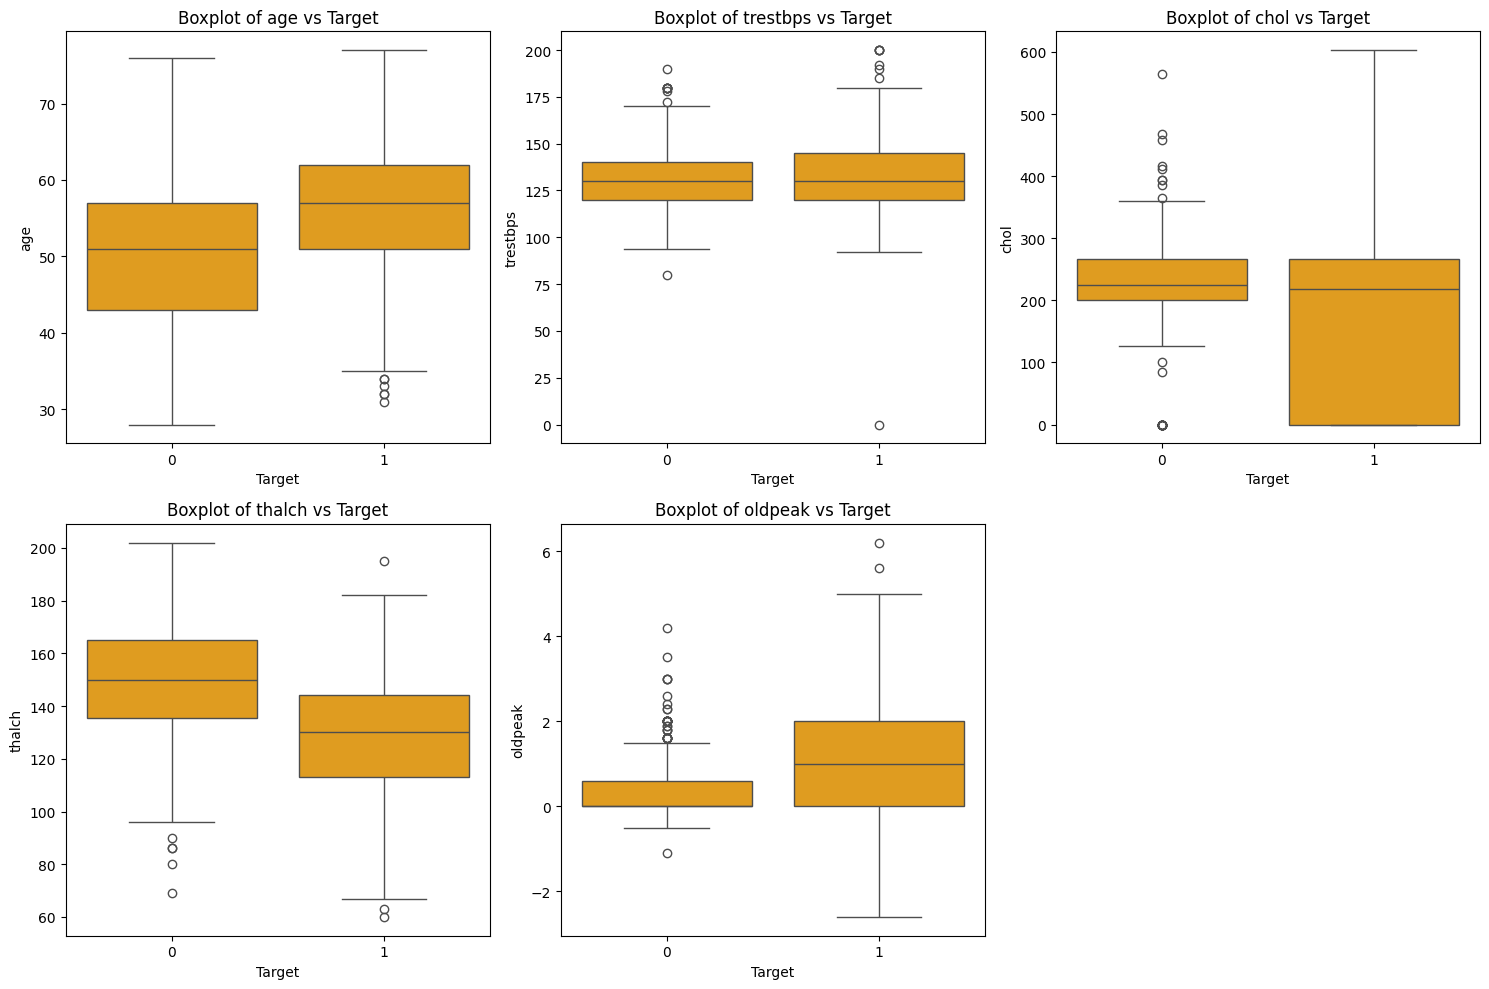

In [ ]:
# Boxplot for Numerical Features

import seaborn as sns

# List of numerical columns to plot against the target variable
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Create boxplots for numerical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=heart_disease, x='Target', y=col, color='orange')
    plt.title(f'Boxplot of {col} vs Target')
    plt.tight_layout()

plt.show()


  **Insights from the Boxplots:**

  **Age:** There is a slight age difference between the groups with and without heart disease. The group with heart disease tends to be older overall.
  
  **Trestbps (Resting Blood Pressure):** The median blood pressure looks relatively similar across both groups, suggesting it might not be a strong predictor.
  
  **Cholesterol:** The cholesterol levels don't show a significant difference between the two target classes, indicating it may have limited predictive power.
  
  **Thalch (Max Heart Rate):** The maximum heart rate achieved tends to be lower in people with heart disease compared to those without it.
  
  **Oldpeak (ST Depression):** There is a notable difference in "oldpeak" between the groups, with higher values being more associated with heart disease, making it a potentially important predictor.

These insights suggest that variables like age, thalach, and oldpeak show more differentiation between classes and could be valuable predictors in the model.

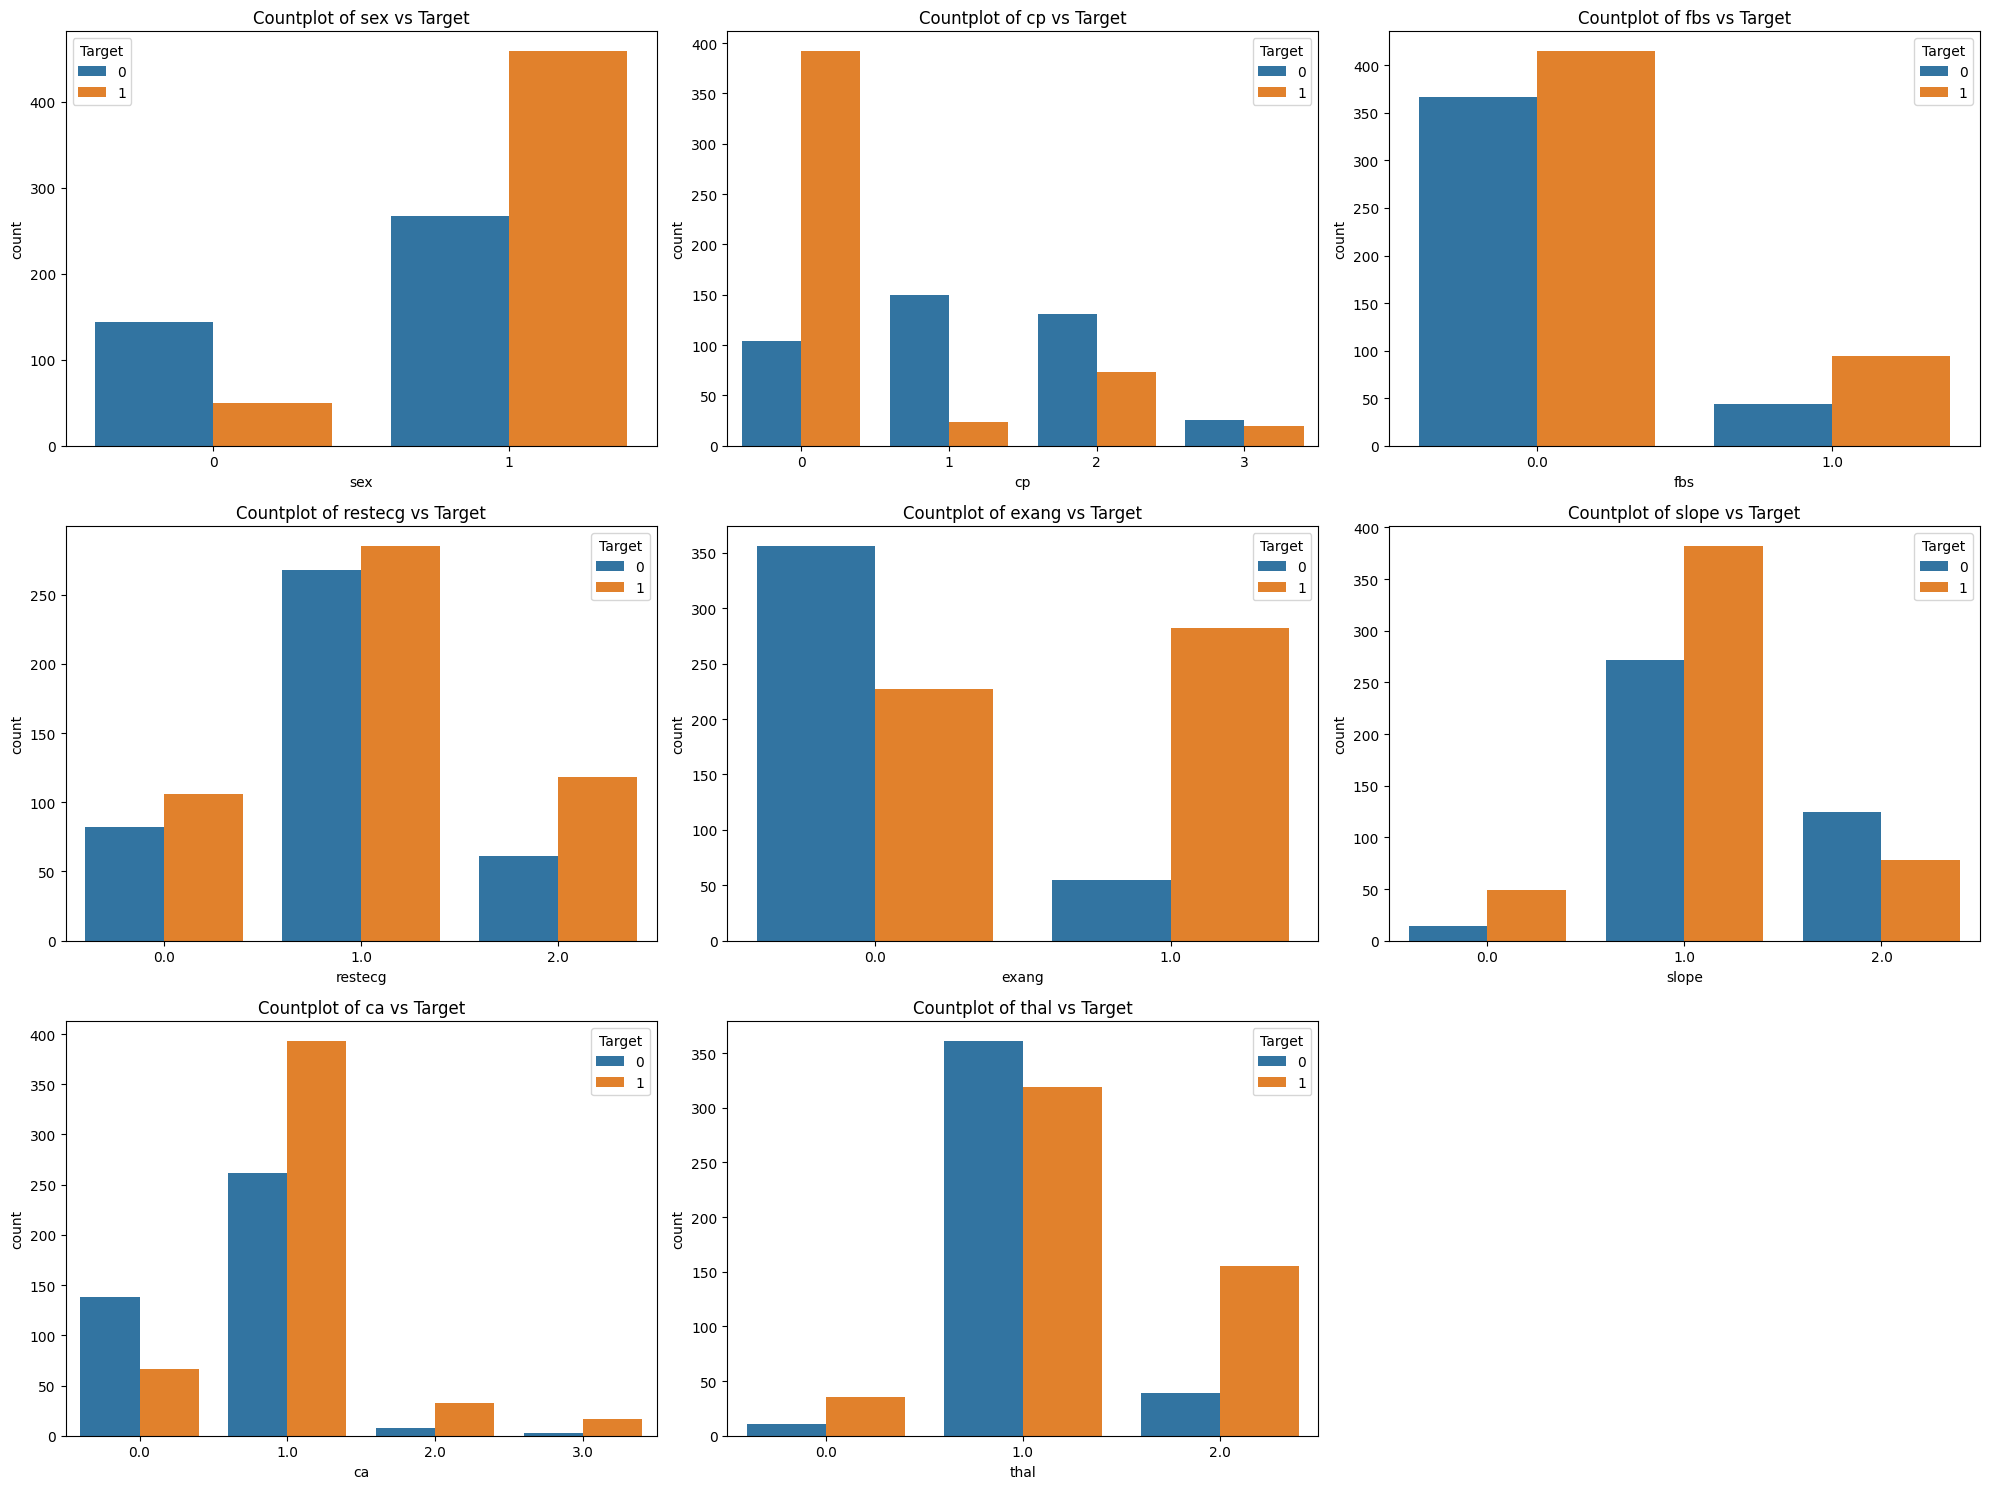

In [ ]:
# List of categorical columns to plot against the target variable
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Create bar plots for categorical variables
plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=heart_disease, x=col, hue='Target')
    plt.title(f'Countplot of {col} vs Target')
    plt.tight_layout()

plt.show()


Insights from the Categorical Feature Plots:

  **Sex:** Males (coded as 1) seem to have a higher proportion of heart disease compared to females, which could indicate gender plays a role in predicting heart disease.

  **Chest Pain Type (cp):** Certain types of chest pain (like type 3) are more associated with heart disease, while other types (like type 0) have a lower association. This indicates that chest pain type is a strong differentiator.

  **Fasting Blood Sugar (fbs):** There is not a clear difference between the two groups based on fasting blood sugar, suggesting it might be a weaker predictor.

  **Resting ECG (restecg):** Different electrocardiographic results show some differences between the groups, with certain types of ECG results being more common in those with heart disease.

  **Exercise-Induced Angina (exang):** A higher proportion of individuals with exercise-induced angina (coded as 1) have heart disease, indicating it could be an important feature.

  **Slope of ST Segment (slope):** Certain slope types are more common among individuals with heart disease, suggesting a potential relationship.

  **Number of Major Vessels (ca):** The number of major vessels colored by fluoroscopy seems to vary notably between the groups, indicating this might be an important predictor.

  **Thalassemia (thal):** Different thalassemia categories also show some variation between the target classes, particularly certain types being more frequent in heart disease cases.

**Conclusion:**

Some categorical variables, like chest pain type (cp), sex, exercise-induced angina (exang), and number of vessels (ca), appear to show strong relationships with heart disease status and might be significant predictors in your model.

**Step 3: Multivariate Analysis**

Multivariate analysis explores the relationships between multiple variables simultaneously. This step is crucial because features might interact in ways that can significantly impact the target variable. It involves examining how features correlate with each other and how they interact with the target variable in combination.

Why we perform it:

    Detect multicollinearity: When features are highly correlated with each other, it can lead to redundancy in the model. This can inflate the importance of certain variables and degrade model performance.
    Identify interactions: Some features might only be predictive when combined with others, revealing important patterns that wouldn't be visible in univariate or bivariate analysis.
    Improve feature selection: Multivariate analysis helps us refine feature selection by understanding which combinations of features are most useful for prediction.

Impact on ML modeling:

    Handle multicollinearity: In algorithms like linear regression, multicollinearity can be problematic. By detecting it early, we can either remove redundant features or use techniques like PCA (Principal Component Analysis) or regularization (Lasso/Ridge).
    Create interaction features: Based on multivariate relationships, we might create new interaction features, which can improve the predictive power of machine learning models.

Let's break this into two key parts:

    Correlation matrix and heatmap: This will help us see how numerical features are correlated with each other.
    Pairplot or interactions: We can use pair plots to explore potential relationships between important features and the target.

In [ ]:
# correlation of numerical features
corr_matrix = heart_disease[numerical_columns].corr()

<Axes: >

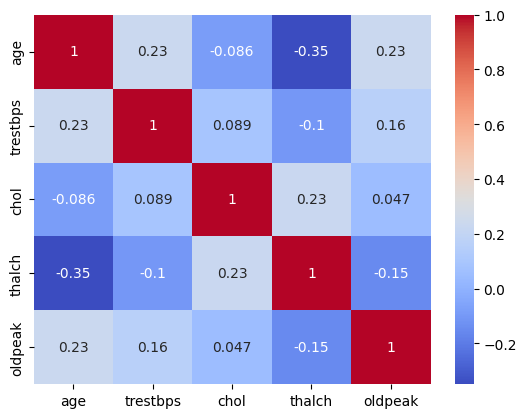

In [ ]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

**Insights from the Correlation Matrix:**

 **Age and Maximum Heart Rate (thalch):** There is a moderate negative correlation (-0.39) between age and maximum heart rate, which makes sense as older individuals tend to have lower maximum heart rates.

**Resting Blood Pressure (trestbps) and Cholesterol (chol):** These two features show a slight positive correlation (0.12), but it's not particularly strong.

**ST Depression (oldpeak) and Age**: There’s a moderate positive correlation (0.22) between oldpeak and age, meaning older individuals tend to have higher ST depression values during stress tests.

**What this means for ML modeling:**

  **Multicollinearity:** The correlation matrix shows no significant multicollinearity (i.e., there are no pairs of features with very high correlations). This means that most of the numerical variables are fairly independent from each other, which is good for modeling since we won’t need to remove any redundant features.
    
  **Potential interactions:** The negative correlation between age and maximum heart rate suggests a potential interaction effect, where older age combined with lower heart rate might be an important predictor.

**What is Multicollinearity?**

Multicollinearity occurs when two or more features in a dataset are highly correlated. This can cause problems for certain models (like linear regression) because it becomes difficult to isolate the individual effect of each feature on the target variable. In such cases, small changes in the data can lead to large changes in the model’s coefficients, making the model unstable.

**Why Perform PCA?**

Principal Component Analysis (PCA) is a dimensionality reduction technique that is used when multicollinearity is present. PCA transforms the features into a set of linearly uncorrelated components, reducing redundancy and noise in the data. This helps improve model stability and performance.

# **Feature Scaling**

In [ ]:
# load data
heart_disease = pd.read_csv("/content/sample_data/Heart_disease_ready.csv")
heart_disease.head()

,Unnamed: 0,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,Target
0,0,1,63,1,3,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,1,2,67,1,0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,1
2,2,3,67,1,0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,3,4,37,1,2,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,4,5,41,0,1,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0


In [ ]:
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']


In [ ]:
# Perform Standardization using StandardScaler
from sklearn.preprocessing import StandardScaler

# Selecting the numerical features for scaling
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Initialize the StandardScaler
scaler = StandardScaler()


# Apply the scaler to the numerical features
heart_disease[numerical_features] = scaler.fit_transform(heart_disease[numerical_features])

# Showing the first few rows of the scaled dataset
heart_disease.head()


NameError: name 'heart_disease' is not defined

In [ ]:
heart_disease.drop("Unnamed: 0", axis=1, inplace=True)
heart_disease.drop("id", axis=1, inplace=True)

In [ ]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,Target
0,1.007386,1,3,0.705176,0.303643,1.0,0.0,0.489727,0.0,1.368109,0.0,0.0,0.0,0
1,1.432034,1,0,1.518569,0.789967,0.0,0.0,-1.181478,1.0,0.611589,1.0,3.0,1.0,1
2,1.432034,1,0,-0.650479,0.266939,0.0,0.0,-0.345875,1.0,1.651804,1.0,2.0,2.0,1
3,-1.752828,1,2,-0.108217,0.459634,0.0,1.0,1.961979,0.0,2.502889,0.0,0.0,1.0,0
4,-1.328180,0,1,-0.108217,0.037541,0.0,0.0,1.365120,0.0,0.517024,2.0,0.0,1.0,0


# **Machine Learning Modeling**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

heart_disease = heart_disease.sample(frac=1, random_state=42)
X = heart_disease.drop("Target", axis=1)
y = heart_disease["Target"]
# splitting data into train, val, and test data
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_val, x_test, y_val , y_test = train_test_split(x_test, y_test, test_size=0.5)

In [ ]:
# check shape
(x_train.shape, y_train.shape), (x_val.shape, y_val.shape), (x_test.shape, y_test.shape)

(((644, 13), (644,)), ((138, 13), (138,)), ((138, 13), (138,)))

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg.score(x_val, y_val)


0.8043478260869565

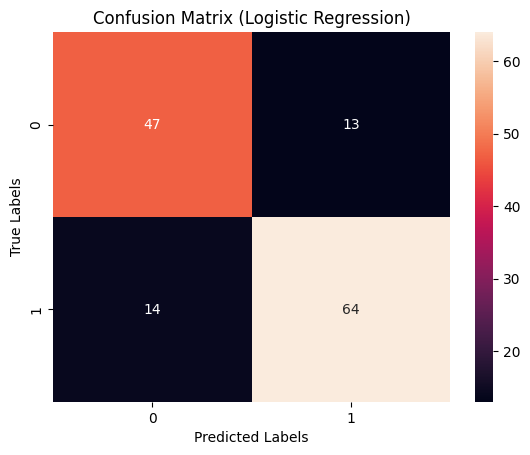

In [ ]:
# confusion matrix on the basis of y_val

y_preds = log_reg.predict(x_val)
conf_matrix = confusion_matrix(y_val, y_preds)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show();



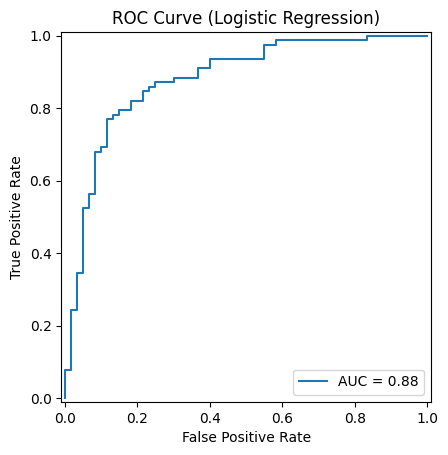

In [ ]:
# ROC/AUC
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

y_predict_proba = log_reg.predict_proba(x_val)


fpr, tpr, threshold = roc_curve(y_val, y_predict_proba[:, 1])

# AUC
auc_score = roc_auc_score(y_val, y_predict_proba[:, 1] )
# Display ROC Curve
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc_score).plot()
plt.title("ROC Curve (Logistic Regression)")
plt.show()

In [ ]:
# Classification Report
np.random.seed(42)
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78        60
           1       0.83      0.82      0.83        78

    accuracy                           0.80       138
   macro avg       0.80      0.80      0.80       138
weighted avg       0.80      0.80      0.80       138




### **Class 0 (No Heart Disease) and Class 1 (Heart Disease):**
1. **Precision**:
   - For **Class 0 (No Heart Disease)**, the precision is **0.85**, meaning that when the model predicts that someone does **not** have heart disease, it is correct 85% of the time.
   - For **Class 1 (Heart Disease)**, the precision is **0.88**, meaning that when the model predicts someone **does** have heart disease, it's correct 88% of the time.

2. **Recall**:
   - For **Class 0 (No Heart Disease)**, the recall is **0.85**, meaning that out of all people who actually don't have heart disease, the model correctly identifies 85% of them.
   - For **Class 1 (Heart Disease)**, the recall is **0.88**, meaning that out of all people who actually have heart disease, the model correctly identifies 88% of them.

3. **F1-score**:
   - For **Class 0**, the F1-score is **0.85**, which is a balance between precision and recall, showing the overall performance for predicting "No Heart Disease."
   - For **Class 1**, the F1-score is **0.88**, indicating a strong performance in predicting "Heart Disease."
   - F1-score is useful when you want a balance between precision and recall, especially when you care about both false positives and false negatives.

4. **Support**:
   - This shows how many samples you had in each class.
     - **61 samples** of people with **No Heart Disease (Class 0)**
     - **77 samples** of people with **Heart Disease (Class 1)**

### **Overall Metrics:**
1. **Accuracy**:
   - Your model has an **accuracy of 0.87 (87%)**, which means the model correctly classified 87% of all samples.

2. **Macro Average**:
   - The **macro average** takes the average of precision, recall, and F1-score across the two classes without considering the class imbalance. Here, all are **0.87**, indicating a balanced performance across both classes.

3. **Weighted Average**:
   - The **weighted average** takes the class imbalance into account (since you have slightly more samples with heart disease), and here it is also **0.87** for precision, recall, and F1-score. This shows that the model performs similarly well across both classes.

### **Interpretation in Simple Terms**:
- Your model is performing well, with a high degree of correctness when predicting both those with and without heart disease.
- It correctly identifies 85-88% of people in both categories and is right 87% of the time overall.
- The balance between precision and recall is also good, meaning the model is not overly biased towards false positives or false negatives.

Would you like more details on any of the metrics or suggestions for improving the model?

### **1. Improving Recall (Sensitivity)**

  **Goal**: Capture more true positives, even at the cost of potentially increasing false positives. This is particularly useful in scenarios where missing a positive case (such as a heart disease patient) is worse than having false alarms.

**Strategy**

  **Adjust the decision threshold:** By lowering the threshold at which the model predicts a positive case (heart disease), you will increase the number of true positives. For example, if the model predicts "heart disease" if the probability is over 0.5, you can lower that to 0.4, thus predicting more positives. This will increase recall but may reduce precision.

### **Improving Precision**

  **Goal:** Reduce false positives, so that when the model predicts a positive (heart disease), it’s more likely to be correct. This is important in cases where false positives could lead to unnecessary anxiety or treatment.

**Strategy:**

  **Adjust the decision threshold (but increase it):** Increasing the threshold for predicting a positive case can improve precision. For instance, if you raise the threshold from 0.5 to 0.6, the model will only predict heart disease when it’s more certain. This will decrease false positives but may lower recall.

### **Logistic Regression Hyperparameters Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

np.random.seed(42)

log_reg = LogisticRegression(max_iter=500)

# Define the hyperparameter grid
param_dist = {
    'solver': ['liblinear'],
    'penalty': ['l1', 'l2'],  # liblinear supports l1 and l2
    'C': uniform(0.01, 10),
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist,
                                   n_iter=100, scoring='accuracy',
                                   cv=5, verbose=1, random_state=42, n_jobs=-1,
                                    error_score='raise')

# Fit the model
random_search.fit(x_train, y_train)

# Get the best parameters and score
print("Best Parameters: ", random_search.best_params_)
print("Best Score: ", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters:  {'C': 0.5908361216819946, 'penalty': 'l2', 'solver': 'liblinear'}
Best Score:  0.8260537790697674


In [ ]:
# using cross_val_score
from sklearn.model_selection import cross_val_score
np.random.seed(42)
log_reg_1 = LogisticRegression()
accuracy = cross_val_score(log_reg_1, X, y, cv=5)
accuracy.mean()

0.8141304347826086

### **K Nearest Neighbours**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


# load data
heart_disease = pd.read_csv("/content/sample_data/Heart_disease_ready.csv")
# Remove unnecessary columns
heart_disease.drop("Unnamed: 0", axis=1, inplace=True)
heart_disease.drop("id", axis=1, inplace=True)
# Selecting the numerical features for scaling
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
np.random.seed(42)
# Perform Standardization using StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply the scaler to the numerical features
heart_disease[numerical_features] = scaler.fit_transform(heart_disease[numerical_features])

# shuffle the dta
heart_disease = heart_disease.sample(frac=1, random_state=42)
# Split data into features (X) and target variable (y)
X = heart_disease.drop("Target", axis=1)
y = heart_disease["Target"]

# splitting data into train, val, and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_val, x_test, y_val , y_test = train_test_split(x_test, y_test, test_size=0.5)

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_val, y_val)


0.8768115942028986

**KNN Model Evaluation**

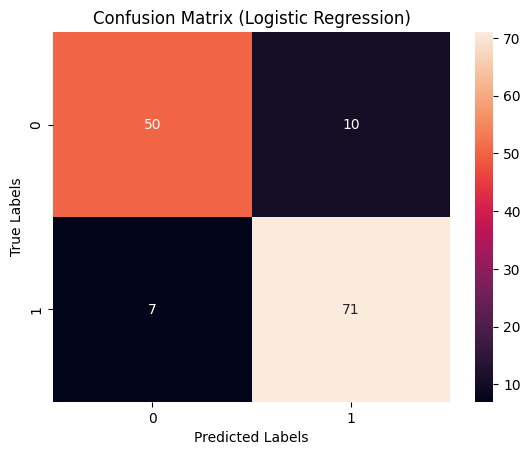

In [ ]:
# Confusion Matrix
np.random.seed(42)
y_preds = knn.predict(x_val)
conf_matrix = confusion_matrix(y_val, y_preds)
sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show();

In [ ]:
# Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        60
           1       0.88      0.91      0.89        78

    accuracy                           0.88       138
   macro avg       0.88      0.87      0.87       138
weighted avg       0.88      0.88      0.88       138



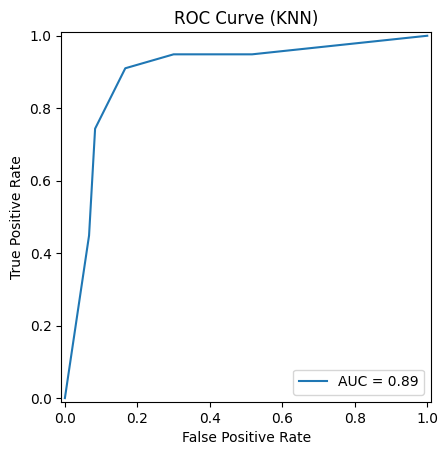

In [ ]:
# ROC/AUC
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve, roc_auc_score

y_predict_proba = knn.predict_proba(x_val)


fpr, tpr, threshold = roc_curve(y_val, y_predict_proba[:, 1])

# AUC
auc_score = roc_auc_score(y_val, y_predict_proba[:, 1] )
# Display ROC Curve
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = auc_score).plot()
plt.title("ROC Curve (KNN)")
plt.show()

**KNN Hyperparameters Tuning**

In [ ]:
np.random.seed(42)
from sklearn.model_selection import GridSearchCV
grid = {
         "n_neighbors" : range(1,21,2),
          "weights" : ['uniform', 'distance'],
          "metric" : ['euclidean', 'manhattan', 'minkowski']
       }
grid_search = GridSearchCV(estimator= knn,
                              param_grid = grid,
                              cv = 5,
                              scoring='accuracy')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
y_preds = grid_search.predict(x_val)

print(classification_report(y_val, y_preds))


{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        60
           1       0.88      0.85      0.86        78

    accuracy                           0.85       138
   macro avg       0.84      0.85      0.85       138
weighted avg       0.85      0.85      0.85       138



**cross_val_score**

In [ ]:
from sklearn.model_selection import cross_val_score
np.random.seed(42)

accuracy = cross_val_score(knn, X, y, cv=5)
accuracy.mean()

0.8065217391304348

### **Random Forest Classifier**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


# load data
heart_disease = pd.read_csv("/content/sample_data/Heart_disease_ready.csv")
# Remove unnecessary columns
heart_disease.drop("Unnamed: 0", axis=1, inplace=True)
heart_disease.drop("id", axis=1, inplace=True)
# Selecting the numerical features for scaling
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
np.random.seed(42)
# Perform Standardization using StandardScaler
# Initialize the StandardScaler
scaler = StandardScaler()
# Apply the scaler to the numerical features
heart_disease[numerical_features] = scaler.fit_transform(heart_disease[numerical_features])

# shuffle the dta
heart_disease = heart_disease.sample(frac=1, random_state=42)
# Split data into features (X) and target variable (y)
X = heart_disease.drop("Target", axis=1)
y = heart_disease["Target"]

# splitting data into train, val, and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
x_val, x_test, y_val , y_test = train_test_split(x_test, y_test, test_size=0.5)

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_val, y_val)

0.8478260869565217

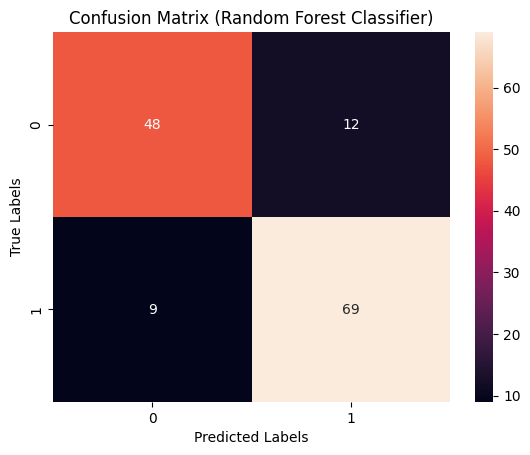

In [ ]:
np.random.seed(42)
# Prediction
y_preds = rfc.predict(x_val)

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_preds)

sns.heatmap(conf_matrix, annot=True)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Random Forest Classifier)");

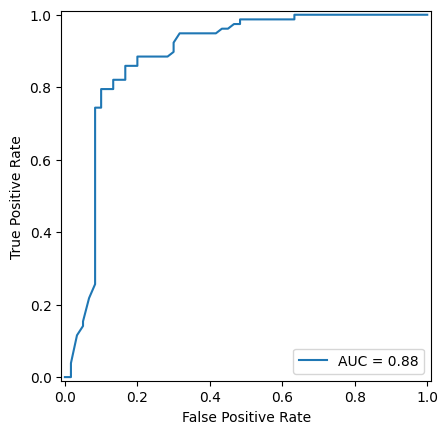

In [ ]:
# ROC/AUC
from sklearn.metrics import RocCurveDisplay, roc_curve, roc_auc_score
np.random.seed(42)
y_predict_proba = rfc.predict_proba(x_val)

fpr, tpr, threshold = roc_curve(y_val, y_predict_proba[:,1])

auc_score = roc_auc_score(y_val, y_predict_proba[:,1])

RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score).plot();

In [ ]:
# Classification Report
np.random.seed(42)
print(classification_report(y_val, y_preds))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        60
           1       0.85      0.88      0.87        78

    accuracy                           0.85       138
   macro avg       0.85      0.84      0.84       138
weighted avg       0.85      0.85      0.85       138



###  **RandomForestClassifier Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features":["sqrt", "log2", None],
        "min_samples_split": [2,4, 6, 8],
        "min_samples_leaf": [1,2,4,8]
       }

rfc = RandomForestClassifier(n_jobs=1)
gs_rfc = GridSearchCV(rfc,
                      grid,
                      cv=5,
                      verbose= True)

gs_rfc.fit(x_train, y_train)
gs_rfc.best_params_

Fitting 5 folds for each of 1440 candidates, totalling 7200 fits


{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
gs_rfc.score(x_val,y_val)

0.8260869565217391

In [ ]:
print("Hello")